<a href="https://colab.research.google.com/github/onleey/Machine-Learning_demo/blob/master/603_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

【Data Scaling(데이터 스케일링)】
- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링(feature scaling)이라고 한다.
- 피처(feature)=컬럼(column) 들마다 데이터의 값이 범위가 다 제각각이거나 단위가 다른 경우 데이터를 학습을 할때 0으로 수렴하거나 무한으로 발산할 수 있다.
  - 분석시에 변수들이 너무 스케일이 다를 경우  => 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우
  - 신경망 학습시에 => 데이터셋의 값이 들쑥날쑥하거나, 매우 큰 경우에는 cost의 값이 발산하여 정상적인 학습이 이루어지지 않습니다.

- 이런 경우 데이터 스켈링을 통해 모든 피처들의 데이터 분포나 범위를 동일하게 조정해 줄 수 있다.
- Scaling 메서드는 scikit-learn의 preprocessing에서 제공한다.
- sklearn에서 제공하는 기본 Scaling 종류
   - StandardScaler : 평균이 0 분산이 1인 정규분포로 변환
   - MinMaxScaler :  0 ~ 1 사이의 실수로 변환
   - RobustScaler : 중앙값이 0, 최대값 1, 최소값 -1 인 분포로 변경
   - MaxAbsScaler : 모든 피처들의 절댓값이 0과 1 사이에 놓이도록 변환
   - Normalizer : 유클리드 거리가 1이 되도록 데이터값을 변환

In [57]:
!pip install mglearn

In [58]:
import mglearn

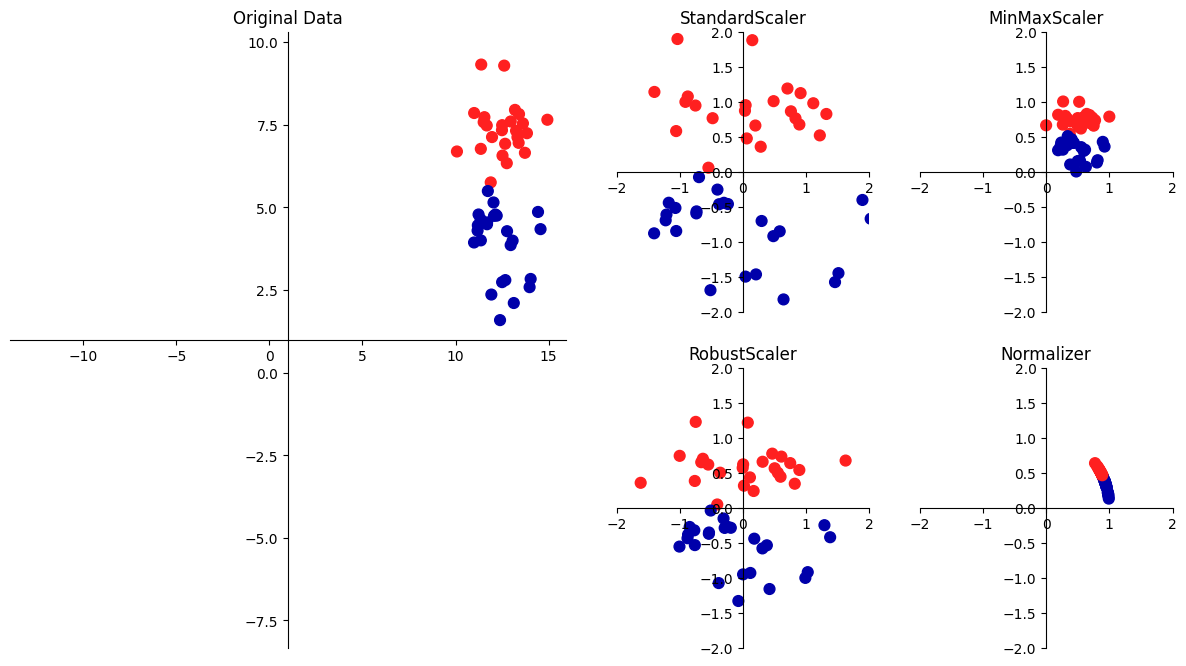

In [59]:
mglearn.plot_scaling.plot_scaling()

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [61]:
iris = load_iris()
print(dir(iris))
print(iris.target)
iris = pd.DataFrame(iris.data,columns = iris.feature_names)
iris['Class']= load_iris().target
iris['Class'] = iris['Class'].map({0:'setosa',1:'Versicolour',2:'virginica'})
iris.head()

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [62]:
from sklearn.model_selection import train_test_split
# X_관측값_훈련, X_관측값 테스트, y정답훈련, y정답테스트
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'),iris['Class'], test_size=0.2)

In [63]:
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
91,6.1,3.0,4.6,1.4
40,5.0,3.5,1.3,0.3
89,5.5,2.5,4.0,1.3
84,5.4,3.0,4.5,1.5
38,4.4,3.0,1.3,0.2


In [64]:
X_train.shape

(120, 4)

In [65]:
X_test.shape

(30, 4)

In [66]:
y_train.value_counts()

Versicolour    42
setosa         39
virginica      39
Name: Class, dtype: int64

In [67]:
y_test.value_counts()

setosa         11
virginica      11
Versicolour     8
Name: Class, dtype: int64

In [68]:
# X_관측값_훈련, X_관측값 테스트, y정답훈련, y정답테스트
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns='Class'),iris['Class'], test_size=0.2, stratify=iris['Class'])

In [69]:
y_train.value_counts()

virginica      40
setosa         40
Versicolour    40
Name: Class, dtype: int64

In [70]:
y_test.value_counts()

virginica      10
Versicolour    10
setosa         10
Name: Class, dtype: int64

In [71]:
import seaborn as sns

In [72]:
type(y_train)
y_train.head(5)

140      virginica
48          setosa
119      virginica
9           setosa
73     Versicolour
Name: Class, dtype: object

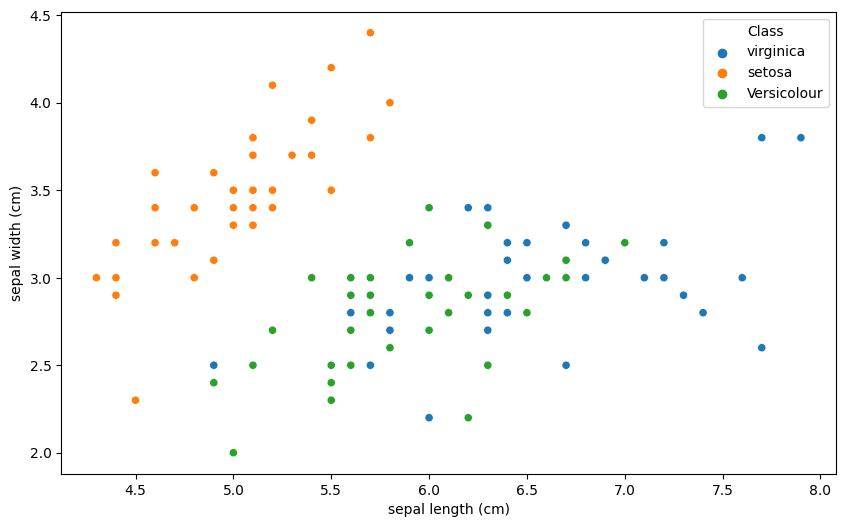

In [73]:
fig=sns.scatterplot(data = X_train, x=X_train.iloc[:,0], y=X_train.iloc[:,1],hue=y_train)
fig.figure.set_size_inches(10,6)


### Standard Scaling

- 표준화 방식으로 평균이 0, 분산이 1인  가우시안 정규 분포를 가진 값으로 변환하는 스케일링이다.
- 최소값과 최대값의 크기를 제한하지 않아 이상치에 매우 민감하므로 이상치를 미리 확인 및 정제한 후 사용하는 것이 좋다.
- 회귀보다는 분류분석에서 유용한다.

In [74]:
StdScaler = StandardScaler()

#Train 데이터의 fitting과 스케일링
StdScaler.fit(X_train) #fit()은 학습을 시키는 메소드이다.
X_train_sc =StdScaler.transform(X_train)

print('\t\t(min, max) (mean,std)')
print('Train_scaled (%.2f,%.2f) (%.2f,%.2f)'%(X_train_sc.min(),X_train_sc.max(),X_train_sc.mean(),X_train_sc.std()))

		(min, max) (mean,std)
Train_scaled (-2.45,2.96) (0.00,1.00)


In [ ]:
StdScaler2 = StandardScaler()
StdScaler2.fit_transform(X_train)

In [75]:
#원래의 훈련 데이터 값
X_train.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
48,5.3,3.7,1.5,0.2
119,6.0,2.2,5.0,1.5
9,4.9,3.1,1.5,0.1
73,6.1,2.8,4.7,1.2


In [76]:
X_train_sc[:5, :]

array([[ 1.05854304,  0.02629443,  1.04850186,  1.57725459],
       [-0.65635793,  1.3785794 , -1.28360897, -1.33867826],
       [ 0.20109255, -2.00213302,  0.70721735,  0.38437297],
       [-1.14632963,  0.02629443, -1.28360897, -1.47122067],
       [ 0.32358548, -0.64984805,  0.53657509, -0.01325424]])

In [77]:
xt= pd.DataFrame(X_train_sc)

In [78]:
xt

,0,1,2,3
0,1.058543,0.026294,1.048502,1.577255
1,-0.656358,1.378579,-1.283609,-1.338678
2,0.201093,-2.002133,0.707217,0.384373
3,-1.146330,0.026294,-1.283609,-1.471221
4,0.323585,-0.649848,0.536575,-0.013254
...,...,...,...,...
115,0.813557,-0.649848,0.479694,0.384373
116,-1.881287,-0.199086,-1.511132,-1.471221
117,-0.901344,0.477056,-1.169847,-0.941051
118,-0.778851,0.702437,-1.340490,-1.338678


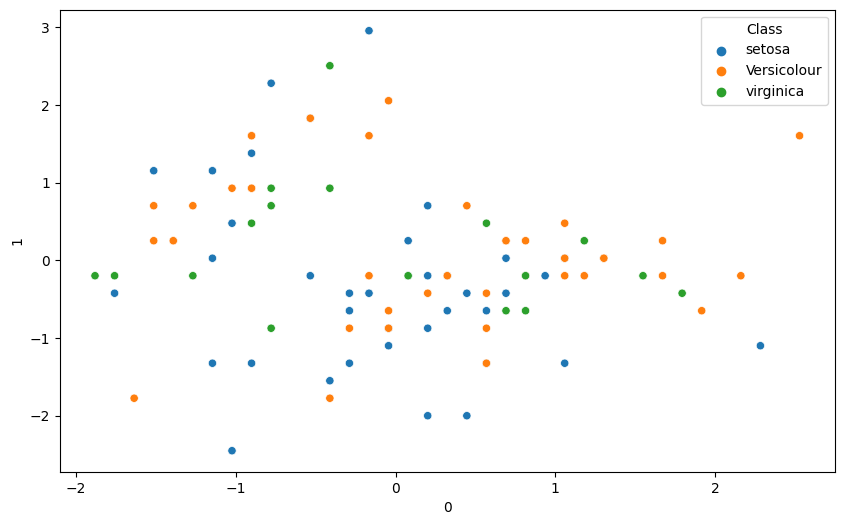

In [79]:
fig=sns.scatterplot(data =xt, x=xt.iloc[:,0], y=xt.iloc[:,1],hue=y_train)
fig.figure.set_size_inches(10,6)

### Min-Max Scaler

- 모든 피처들이 0과 1 사이의 값으로 스케일링하는 방식이며 최소값 0, 최대값이 1이 된다.
- 데이터가 2차원인 경우, 모든 데이터는 x, y 축의 0과 1 사이에 존재한다.
- 이상치가 존재한다면, 이상치가 극값이 되어 데이터가 아주 좁은 범위에 분포하게 때문에 데이터 그대로 스케일링 방법으로 적절하지 않다.(즉 이상치에 취약하다)
-  그러므로 이상치를 미리 정제한 후 수행하는 것이 좋다.
- 분류보다 회식에 유용하다.

In [83]:
from sklearn.preprocessing import MinMaxScaler

MmScaler = MinMaxScaler()

# Train 데이터의 fitting과 스케일링
# fit()은 학습을 시키는 메소드이다.
MmScaler.fit(X_train)

#transform()은 실제로 학습시킨 것을 적용하는 메소드이다.
X_train_sc = MmScaler.transform(X_train)

print('\t\t(min, max)  (mean,std)')
print('Train_scaled (%.2f, %.2f) ( %.2f, %.2f)'%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(),X_train_sc.std()))

		(min, max)  (mean,std)
Train_scaled (0.00, 1.00) ( 0.45, 0.26)


(480,)


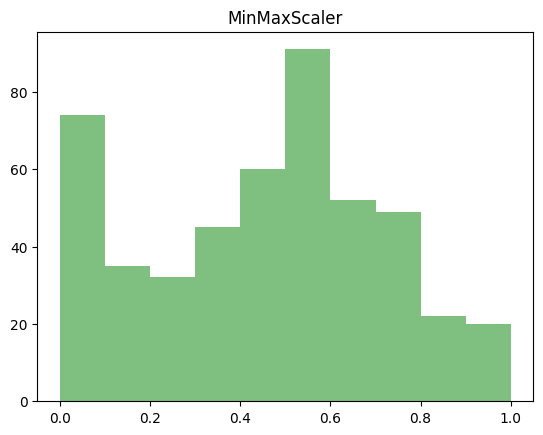

In [89]:
X_train_sc_flat = X_train_sc.flatten()
print(X_train_sc_flat.shape)
#print(X_train_sc_flat)
plt.hist(X_train_sc_flat,color='green',alpha=0.5)
plt.title('MinMaxScaler')
plt.show()

In [99]:
xt= pd.DataFrame(X_train_sc).T

In [100]:
xt.iloc[0,:].shape

(120,)

In [101]:
xt.iloc[1,:].shape

(120,)

In [103]:
y_train.shape

(120,)

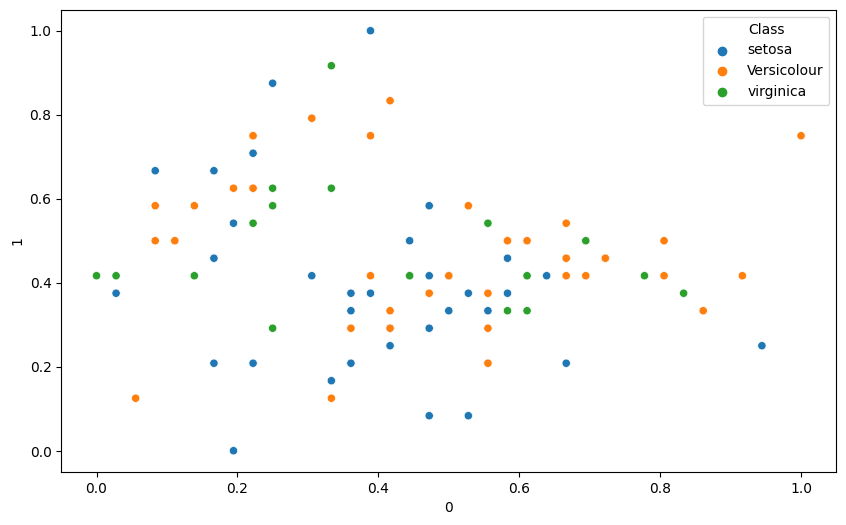

In [104]:
fig=sns.scatterplot(data =xt, x=xt.iloc[0,:], y=xt.iloc[1,:],hue=y_train)
fig.figure.set_size_inches(10,6)

### Max Abs Scaler

- 모든 피처들을 절대값이 0과 1사이가 되도록 스케일링합니다. 즉, 모든 값은 -1과 1사이로 표현되며, 데이터가 양수일 경우 MinMaxScaler와 같습니다.
- 이상치에 민감하며, 분류보다는 회귀분석에서 유용한다.

In [108]:
from sklearn.preprocessing import MaxAbsScaler

MaScaler = MaxAbsScaler()

# Train 데이터의 fitting과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# Test 데이터의 스케일링
#X_test_sc = MaScaler.transform(X_test)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))
#print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(),  X_test_sc.mean(),  X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.62, 0.24)


In [109]:
X_train_sc.shape

(120, 4)

In [114]:
xt= pd.DataFrame(X_train_sc).T

In [115]:
xt.shape

(4, 120)

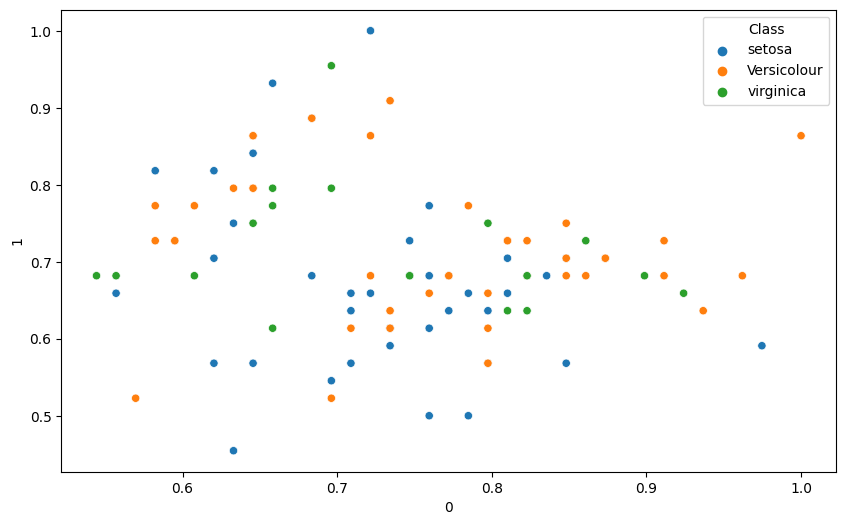

In [116]:
fig=sns.scatterplot(data =xt, x=xt.iloc[0,:], y=xt.iloc[1,:],hue=y_train)
fig.figure.set_size_inches(10,6)

### Robust Scaler

- StandardScaler는 평균과 분산을 사용했지만 RobustScaler는 평균과 분산 대신 중앙값(Median)과 사분위(quartile) 값을 활용하는 방식으로, 중앙값을 0으로 설정하고 IQR을 사용하여 이상치의 영향을 최소화한다.

In [117]:
from sklearn.preprocessing import RobustScaler

RuScaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)



print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))

		(min, max) (mean, std)
Train_scaled (-1.67, 2.33) (-0.02, 0.61)


In [118]:
xt = pd.DataFrame(X_train_sc.T)

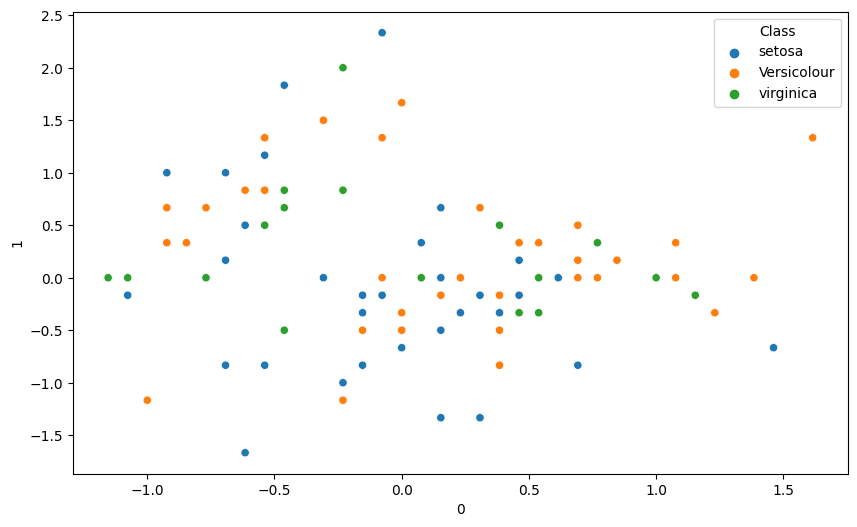

In [119]:
fig=sns.scatterplot(data =xt, x=xt.iloc[0,:], y=xt.iloc[1,:],hue=y_train)
fig.figure.set_size_inches(10,6)

### Normalizer

- 앞의 4가지 방법은 각 피처(feature)의 통계치를 이용한다. 즉, 열(columns)를 대상으로 한다.
- 그러나 Normalizer 의 경우 각 행(row)마다 정규화가 진행한다.
- 이는 한 행의 모든 피처들 사이의 유클리드 거리가 1이 되도록 데이터값을 만들어 준다.
- 이렇게 하면 좀 더 빠르게 학습할 수 있고 과대적합 확률을 낮출 수  있다.

In [124]:
from sklearn.preprocessing import Normalizer

NoScaler = Normalizer()


# Train 데이터의 fitting과 스케일링
NoScaler.fit(X_train)
X_train_sc = NoScaler.transform(X_train)


print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(),  X_train_sc.mean(),  X_train_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.01, 0.86) (0.44, 0.24)


In [142]:
xt = pd.DataFrame(X_train_sc.T)

In [144]:
xt

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.699970,0.798370,0.727126,0.818031,0.736599,0.770119,0.715249,0.822106,0.761852,0.765783,...,0.726348,0.747142,0.691935,0.778674,0.806420,0.758175,0.802513,0.805978,0.816094,0.713666
1,0.323867,0.557353,0.266613,0.517530,0.338111,0.353497,0.405308,0.513816,0.340112,0.603791,...,0.380468,0.339610,0.325616,0.594624,0.542782,0.326599,0.559893,0.521515,0.533600,0.283511
2,0.585050,0.225954,0.605938,0.250418,0.567543,0.504996,0.536437,0.239781,0.530575,0.220899,...,0.541879,0.543376,0.600355,0.198208,0.232621,0.536555,0.205294,0.268659,0.219718,0.615903
3,0.250736,0.030127,0.181781,0.016695,0.144905,0.164124,0.190733,0.051382,0.149649,0.014727,...,0.184469,0.176597,0.234037,0.028315,0.031016,0.174964,0.018663,0.079017,0.031388,0.175972


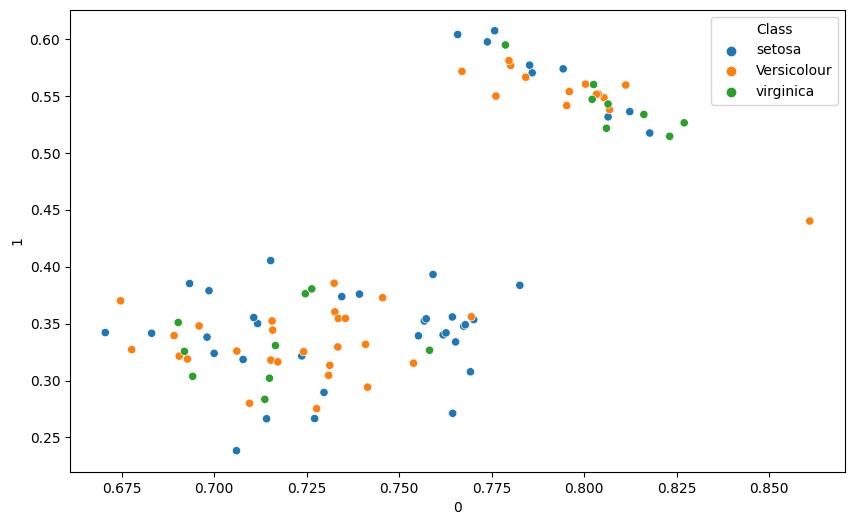

In [128]:
fig=sns.scatterplot(data =xt, x=xt.iloc[0,:], y=xt.iloc[1,:],hue=y_train)
fig.figure.set_size_inches(10,6)

In [146]:
x = X_train.iloc[:,0], y=X_train.iloc[:,1], hue=y_train

ValueError: ignored

In [133]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
48,5.3,3.7,1.5,0.2
119,6.0,2.2,5.0,1.5


In [134]:
X_train.iloc[:,0].shape

sepal length (cm)    6.7
sepal width (cm)     3.1
petal length (cm)    5.6
petal width (cm)     2.4
Name: 140, dtype: float64

In [138]:
X_train.iloc[:,1].shape

(120,)

In [139]:
y_train.shape

(120,)

x트레인 원본어쩌고로 변경

In [150]:
print(X_train,head())

NameError: ignored

In [148]:
X_Original = RuScaler.inverse_transform(X_train_sc)
pd.DataFrame(X_Original).head(3)

,0,1,2,3
0,6.709961,3.194320,6.456180,1.726103
1,6.837881,3.334412,5.163434,1.395191
2,6.745264,3.159968,6.531378,1.622672
